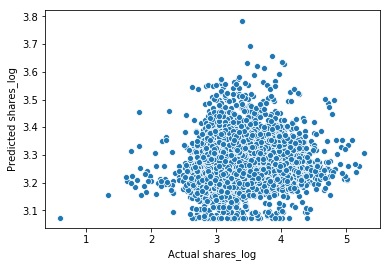

In [42]:

sns.scatterplot(y_test, y_test_p)
plt.xlabel('Shares_log data')
plt.ylabel('Shares_log predi')
plt.show()

# Week 3 - Build a linear regression model to predict the log number of shares an article received

#### 1. Explain briefly in your own words how linear regression works

Linear regression models are used to show or predict the relationship between two variables. The variable that we predict is a *dependent variable*. The variable that we use to predict dependent variable is called *independent variable*. Regression line can show positive relationship, negative relationship or no relationship.

#### 2. Pre-processing steps and the head() of the resulting data frame

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('data Mashable.csv')
df = df.dropna()
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


#### 4. Splitting the dataset into a training and test set

In [23]:
df.corr()


,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


There is moderate relation between share_log and shares (0.483322). Other relations with share_log : num_imgs (0.085575), data_channel_is_socmed (0.085516), global_subjectivity (0.093021), is_weekend (0.105919).

In [24]:

y = df['shares_log'] # rating is Y
x = df[['num_imgs', 'data_channel_is_socmed', 'global_subjectivity', 'is_weekend','title_subjectivity']] # selecting columns
x.index = df['id'] # articles' id
x.head()

,num_imgs,data_channel_is_socmed,global_subjectivity,is_weekend,title_subjectivity
id,,,,,
1,12,0,0.439379,0,0.666667
2,6,0,0.300454,0,0.000000
3,0,0,0.575486,0,0.000000
4,2,0,0.327220,0,0.000000
5,18,0,0.507709,0,0.000000


I choose different variables such as number of images, is article include social media, subject of the text, if article was published during weekend and subject of the title. I think these variables may give interesting result.

#### Train data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #split the data, store it into different variables
x_train.head()

,num_imgs,data_channel_is_socmed,global_subjectivity,is_weekend,title_subjectivity
id,,,,,
20922,0,0,0.451711,1,0.500000
4486,9,0,0.476976,0,0.100000
17756,1,0,0.488495,0,0.000000
4705,23,0,0.545746,0,0.454545
13494,13,0,0.507042,0,0.750000


#### 5. Create linear regression model to predict the number of shares


In [32]:
lm = LinearRegression() 
model = lm.fit(x_train, y_train) 

In [37]:
coef = pd.DataFrame(x.columns.values, lm.coef_)
coef

,0
0.003609,num_imgs
0.135758,data_channel_is_socmed
0.282149,global_subjectivity
0.126623,is_weekend
0.039614,title_subjectivity


In [ ]:
Global subjectivity increases shares_log by 0.282, if article include social media, share_log raises by 0.135. Publishing article in the weekend adds 0.126. 

Subjectivity of the title adds 0.039 to shares_log.

Number of images increase share_log by 0.003.

In [39]:
y_test_p = lm.predict(x_test) # R^2
r2_score(y_test, y_test_p)

0.035494086326490315

The R^2 is 0.354 (35,4% of the variation is explained)


In [41]:
math.sqrt(mean_squared_error(y_test, y_test_p))


0.3987606189453268

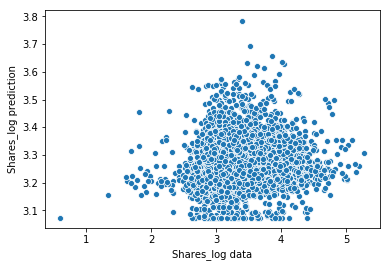

In [43]:

sns.scatterplot(y_test, y_test_p)
plt.xlabel('Shares_log data')
plt.ylabel('Shares_log prediction')
plt.show()